In [3]:
#Importing the Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #for split the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings( "ignore" )

**1. Load the Titanic dataset from kaggle to working environment.**

In [4]:
data= pd.read_csv("Titanic_Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**2. Perform exploratory analysis on the loaded dataset and draw your inferences.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.shape

(891, 12)

<AxesSubplot:xlabel='Survived', ylabel='count'>

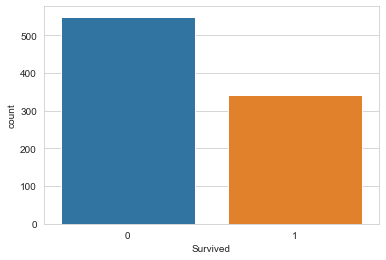

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

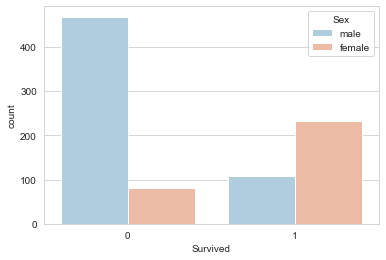

In [9]:
sns.countplot(x='Survived',data=data ,hue='Sex',palette='RdBu_r')

**3. From the above analysis if any attributes are not relevant in accessing the survival pattern of the passenger then drop those columns.**

In [10]:
data = data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [11]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


**4. Check for the missing values in the modified dataset and fill the missing values with appropriate methods.**

In [12]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(9)

,Total,%
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Pclass,0,0.0
Survived,0,0.0


In [13]:
data["Embarked"][data["Embarked"].isna()]= "S"

In [14]:
data["Age"][data["Age"].isna()] = data["Age"].mean()
data.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64

In [15]:
data['Sex'] = data['Sex'].map({"male": 0, "female": 1})

In [16]:
data['Fare'] = data['Fare'].fillna(0)
data['Fare'] = data['Fare'].astype(int)

In [17]:
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [18]:
data['Age'] = data['Age'].astype(int)

In [19]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0
5,0,3,0,29,0,0,8,2
6,0,1,0,54,0,0,51,0
7,0,3,0,2,3,1,21,0
8,1,3,1,27,0,2,11,0
9,1,2,1,14,1,0,30,1


**5. Split the modified dataset into 80-20 ratio for training and testing.**

In [23]:
y = data['Survived']
X = data.drop(['Survived'], axis=1).values 
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 10)

**6. Apply Logistic Regression and design a model on the training data.**

In [24]:
logmodel = LogisticRegression()

**7. Fit the created model on the test data.**

In [25]:
logmodel.fit(X_train,y_train)

LogisticRegression()

**8. Apply Logistic Regression on data before step-5 with 10-fold cross validation.**

In [22]:
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.7666666666666667, 0.8202247191011236, 0.7752808988764045, 0.8202247191011236, 0.7640449438202247, 0.7752808988764045, 0.7640449438202247, 0.7640449438202247, 0.8539325842696629, 0.8202247191011236]
Avg accuracy : 0.7923970037453184


**9. Evaluate the created models with appropriate classification metrics.**

In [26]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Survived", sum(pp!=0))
print("NOT Survived", sum(pp==0))

0.8212290502793296
Survived 62
NOT Survived 117


array([[101,  16],
       [ 16,  46]], dtype=int64)

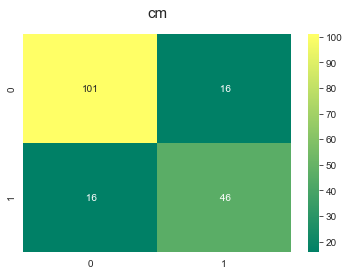

In [27]:
cm = confusion_matrix(y_test,pp)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,pp),annot=True,fmt='3.0f',cmap="summer")
plt.title('cm', y=1.05, size=15)
cm

**10. If you found any Hyperparameters for Logistic regression classifier, tunes those parameters for improving the performance of the model.**

In [28]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=5,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,y_train)
LRM_best = gsLRM.best_estimator_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:   13.0s


[LibLinear]

[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:   14.8s finished


In [29]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.46 %
